In [1]:
from keras.models import load_model
model= load_model('cats_and_dogs_small_2.h5')
model.summary() # As a reminder

Using TensorFlow backend.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

(1, 150, 150, 3)


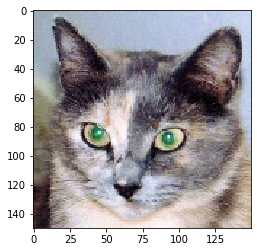

(1, 1)


In [19]:
img_path ='C:/Users/willk/Desktop/Kim/small/test/cats/cat.1700.jpg'
# 이미지를 4D 텐서로 변경합니다
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img) # (150, 150, 3)
img_tensor = np.expand_dims(img_tensor, axis=0) # 앞차원
# img_tensor = img_tensor.reshape((1,) + img_tensor.shape)
# 모델이 훈련될 때 입력에 적용한 전처리 방식
img_tensor /= 255.
print(img_tensor.shape) # (1, 150, 150, 3) Listing 5.25 Preprocessing a single image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [6]:
from keras import models
# Extracts the outputs of the top eight layers
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, #cat image
                                outputs=layer_outputs) # 8 output layers

In [18]:
activations = activation_model.predict(img_tensor) #cat image

AttributeError: 'list' object has no attribute 'shape'

In [8]:
first_layer_activation = activations[0]
print(first_layer_activation.shape) 

(1, 148, 148, 32)


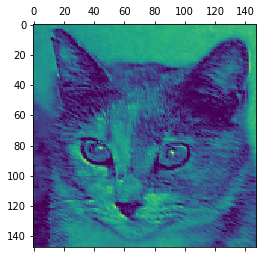

In [9]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

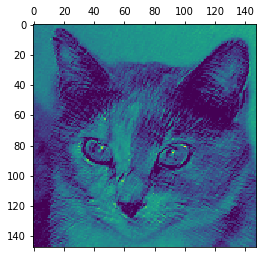

In [10]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

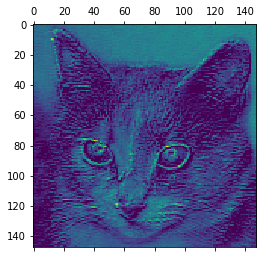

In [15]:
plt.matshow(first_layer_activation[0, :, :, 17], cmap='viridis')

C:\Users\willk\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


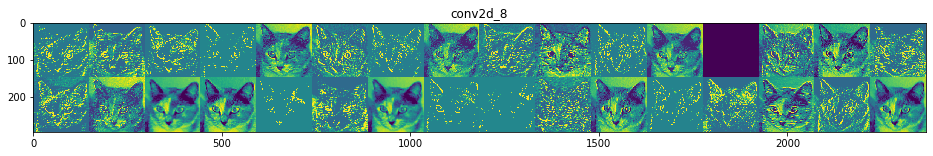

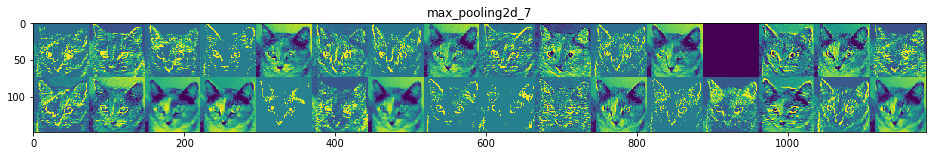

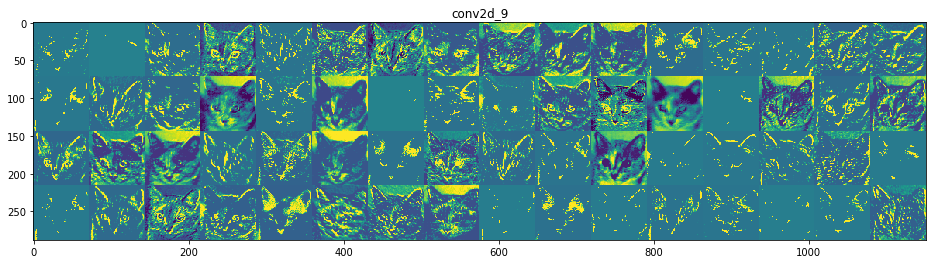

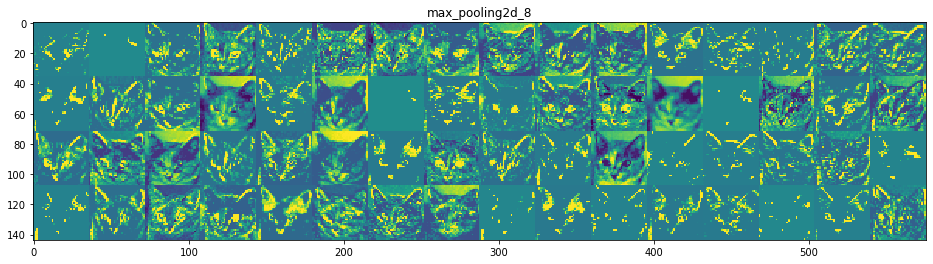

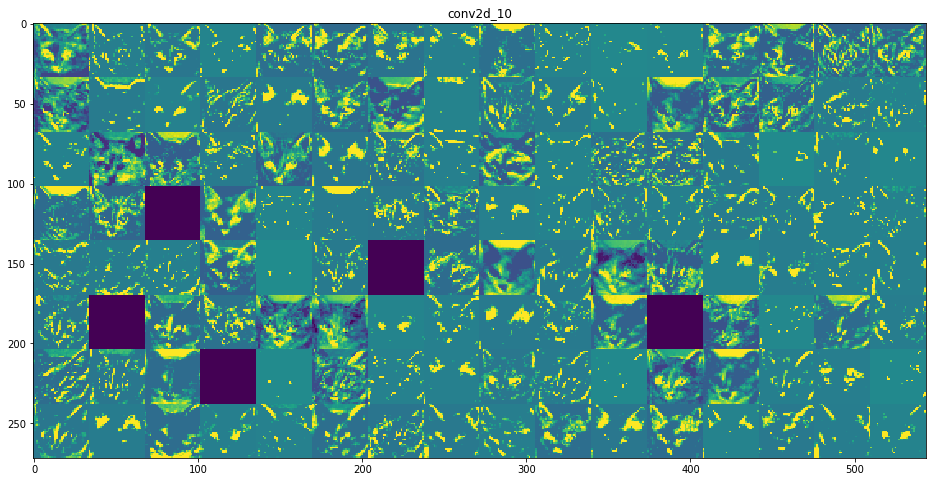

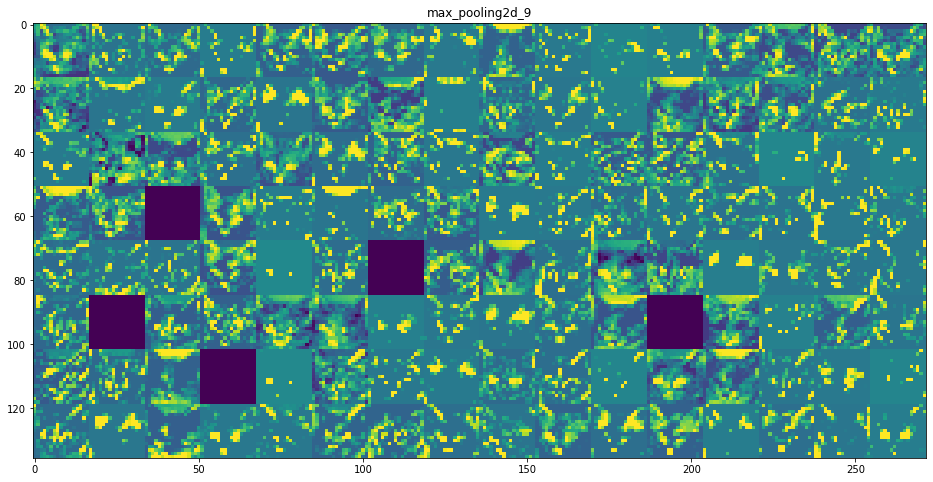

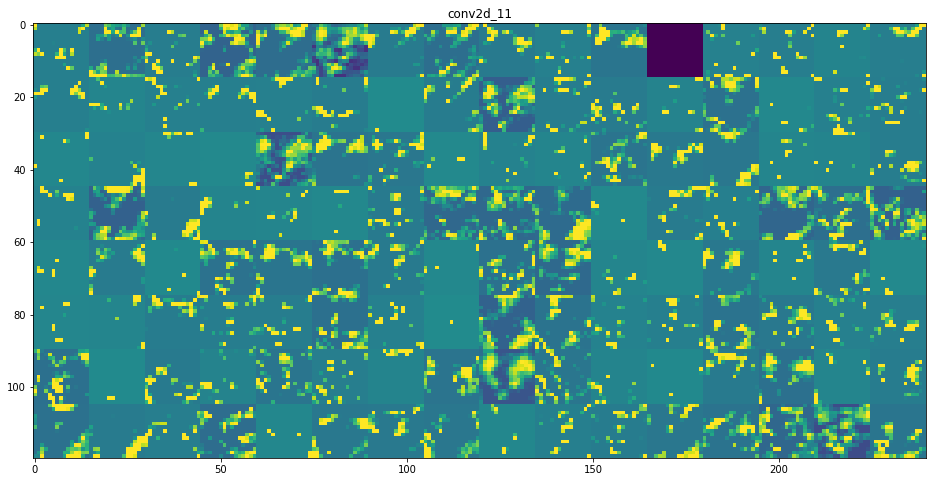

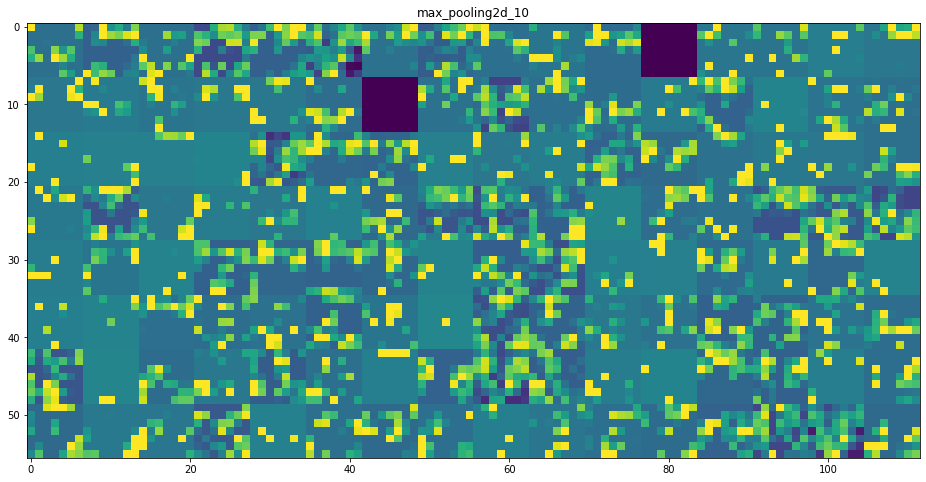

In [16]:
layer_names = [] # Names of the layers
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

# Displaysthe feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1] # 맨뒤-32,32,64,64,128,128,128,128
    
    size = layer_activation.shape[1] # (1, size, size, n_features) # 148,74,72,…
    
    n_cols = n_features // images_per_row # 32 // 16 몫 2
    display_grid = np.zeros((size * n_cols, images_per_row * size)) #(296, 2368)
    
    for col in range(n_cols): # 2
        for row in range(images_per_row): # 16
            channel_image = layer_activation[0, :, :, col * images_per_row + row] #0~15, 16~31
            # Post-processes the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std() # z-dist
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            #np.clip(a, a_min, a_max, out=None)
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    scale = 1. / size # Displays the grid
    plt.figure(figsize=(scale * display_grid.shape[1], # 1./148 * 2368 = 16
                        scale * display_grid.shape[0])) # 1./148 * 296 = 2
    plt.title(layer_name)
    plt.grid(False) # 격자선 제거
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()